# First Jupyter Notebook

This is my First Jupyter Notebook!

There are two types of cells:

- Markdown
- Code 

There are multiple Text styles possible

1. *italice*
2. **BOLD**


# Importing Libraries

A library needs to be imported into the Notebook

It is common practice to import libraries with AS to create an abbreviated name form the library to reference later in the notebook

In [1]:
import pandas as pd

# Reading in an Excel File

Pandas can read in an excel file below, by passing the location of the file.

If the file is in the same location as the notebook, read_excel only needs the name of the file

In [3]:
df = pd.read_excel('/Users/niallsheppard/Python Exercises/Data Exploration and Cleaning/default_of_credit_card_clients__courseware_version_1_21_19.xls')

# Initial Data Exploration

- Check the shape of the data, (rows, columns)
- View the columns in the data
- View the first few lines in the data


In [4]:
df.shape

(30000, 25)

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Do we have a Unique Identifier

1. How many unique values are there in the "ID" column
2. Compare to the shape
    - Conclude there are some duplicate values
3. Find the amount of times each ID appears in the Dataset
4. Summarise the amount of times Duplicate IDs Appear
    - Conclude no ID appears more than twice

In [9]:
df['ID'].nunique()

29687

In [10]:
df.shape

(30000, 25)

In [12]:
id_counts = df['ID'].value_counts()
id_counts.head()

ebda7f71-7024    2
7fe414ae-32f8    2
30729bb5-55d7    2
a17f0f1f-d9f6    2
7b6e060a-97a0    2
Name: ID, dtype: int64

In [13]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

# Boolean Masks - Contrived Example

1. Import Numpy
2. Set seed value for reproducability
3. Generate random integers between 1 and 5
4. Create an array
    - If random_integers[i] == 3 then is_equal_to_3[i] = TRUE
5. Check the amount of random numbers that are equal to 3
6. Return the elements that are equal to 3


In [14]:
import numpy as np

In [15]:
np.random.seed(seed = 24)

In [16]:
random_integers = np.random.randint(low = 1, high = 5, size = 100)

In [17]:
random_integers[:5]

array([3, 4, 1, 4, 2])

In [18]:
is_equal_to_3 = random_integers == 3

In [19]:
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [20]:
sum(is_equal_to_3)

22

In [21]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# Boolean Masks - Applied to Our Data Set

1. Dupe masks contains duplicated IDs
2. Return all the duplicated IDs
3. Return columns from original Data that contain duplicated IDS
    - Conclude that first duplicated row contains data and second duplicated row contains non-sensical 0's
4. Check if individual elements of the original DF are equal to 0
5. Check if all elements, except for first column, (0 indexing), are set 0
6. Check the numnber of rows where all columns, except the first, are 0
    - Conclude this will realistically remove all duplkicates and other spurious data
7. Remove all rows that contain only 0's

In [22]:
dupe_masks = id_counts == 2

In [23]:
dupe_masks[0:5]

ebda7f71-7024    True
7fe414ae-32f8    True
30729bb5-55d7    True
a17f0f1f-d9f6    True
7b6e060a-97a0    True
Name: ID, dtype: bool

In [24]:
id_counts.index[0:5]

Index(['ebda7f71-7024', '7fe414ae-32f8', '30729bb5-55d7', 'a17f0f1f-d9f6',
       '7b6e060a-97a0'],
      dtype='object')

In [25]:
dupe_ids = id_counts.index[dupe_masks]

In [27]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [28]:
dupe_ids[0:5]

['ebda7f71-7024',
 '7fe414ae-32f8',
 '30729bb5-55d7',
 'a17f0f1f-d9f6',
 '7b6e060a-97a0']

In [30]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
644,ebda7f71-7024,30000,2,2,1,31,0,0,2,0,...,19006,19637,21251,3200,0,742,1000,2000,0,0
744,ebda7f71-7024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22827,7fe414ae-32f8,400000,2,3,1,42,-1,-1,-1,-1,...,13088,28540,11860,10132,16932,13088,28540,11860,3978,0
22927,7fe414ae-32f8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27333,30729bb5-55d7,110000,1,2,2,42,0,0,2,2,...,56309,58359,109312,5150,2000,0,2800,54000,0,0
27433,30729bb5-55d7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_zero_mask = df == 0

In [32]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [34]:
sum(feature_zero_mask)

315

In [35]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [38]:
df_clean_1.shape

(29685, 25)

In [41]:
df_clean_1['ID'].nunique()

29685

# Checking Values in the data

1. Check the a summary for the newly cleaned data
    - Conclude there are no NULL values
    - Conclude that PAY_1 is not as we would expect
2. Check the values of PAY_1
    - Conclude there are missing Values
3. Create a mask
    - Check for how many rows the data is not available
    - Remove the Non Available Data
4. Cast PAY_1 as an Integer
5. Check everything so far has worked as expected

In [42]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [43]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [44]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [52]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

In [53]:
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [54]:
sum(valid_pay_1_mask)

26664

In [55]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [57]:
df_clean_2.shape

(26664, 25)

In [58]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [59]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [60]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

# Visualising Data and further Data Exploration and Cleaning

1. Import the plotting LIBRARY
    - Some settings can also be made here
2. Plot a histogram of two seperate columns
3. Get some basic summary statistics about some variables
4. Check the different values of EDUCATION
    - Conclude some values where not mentioned in the Data dictionary
    - Lump this values into the corresponding 'Other' category
5. Repeat step 4 the above with marriage


In [61]:
import matplotlib.pyplot as plt

#render plotting automatically
%matplotlib inline

import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 400 #high resolution

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

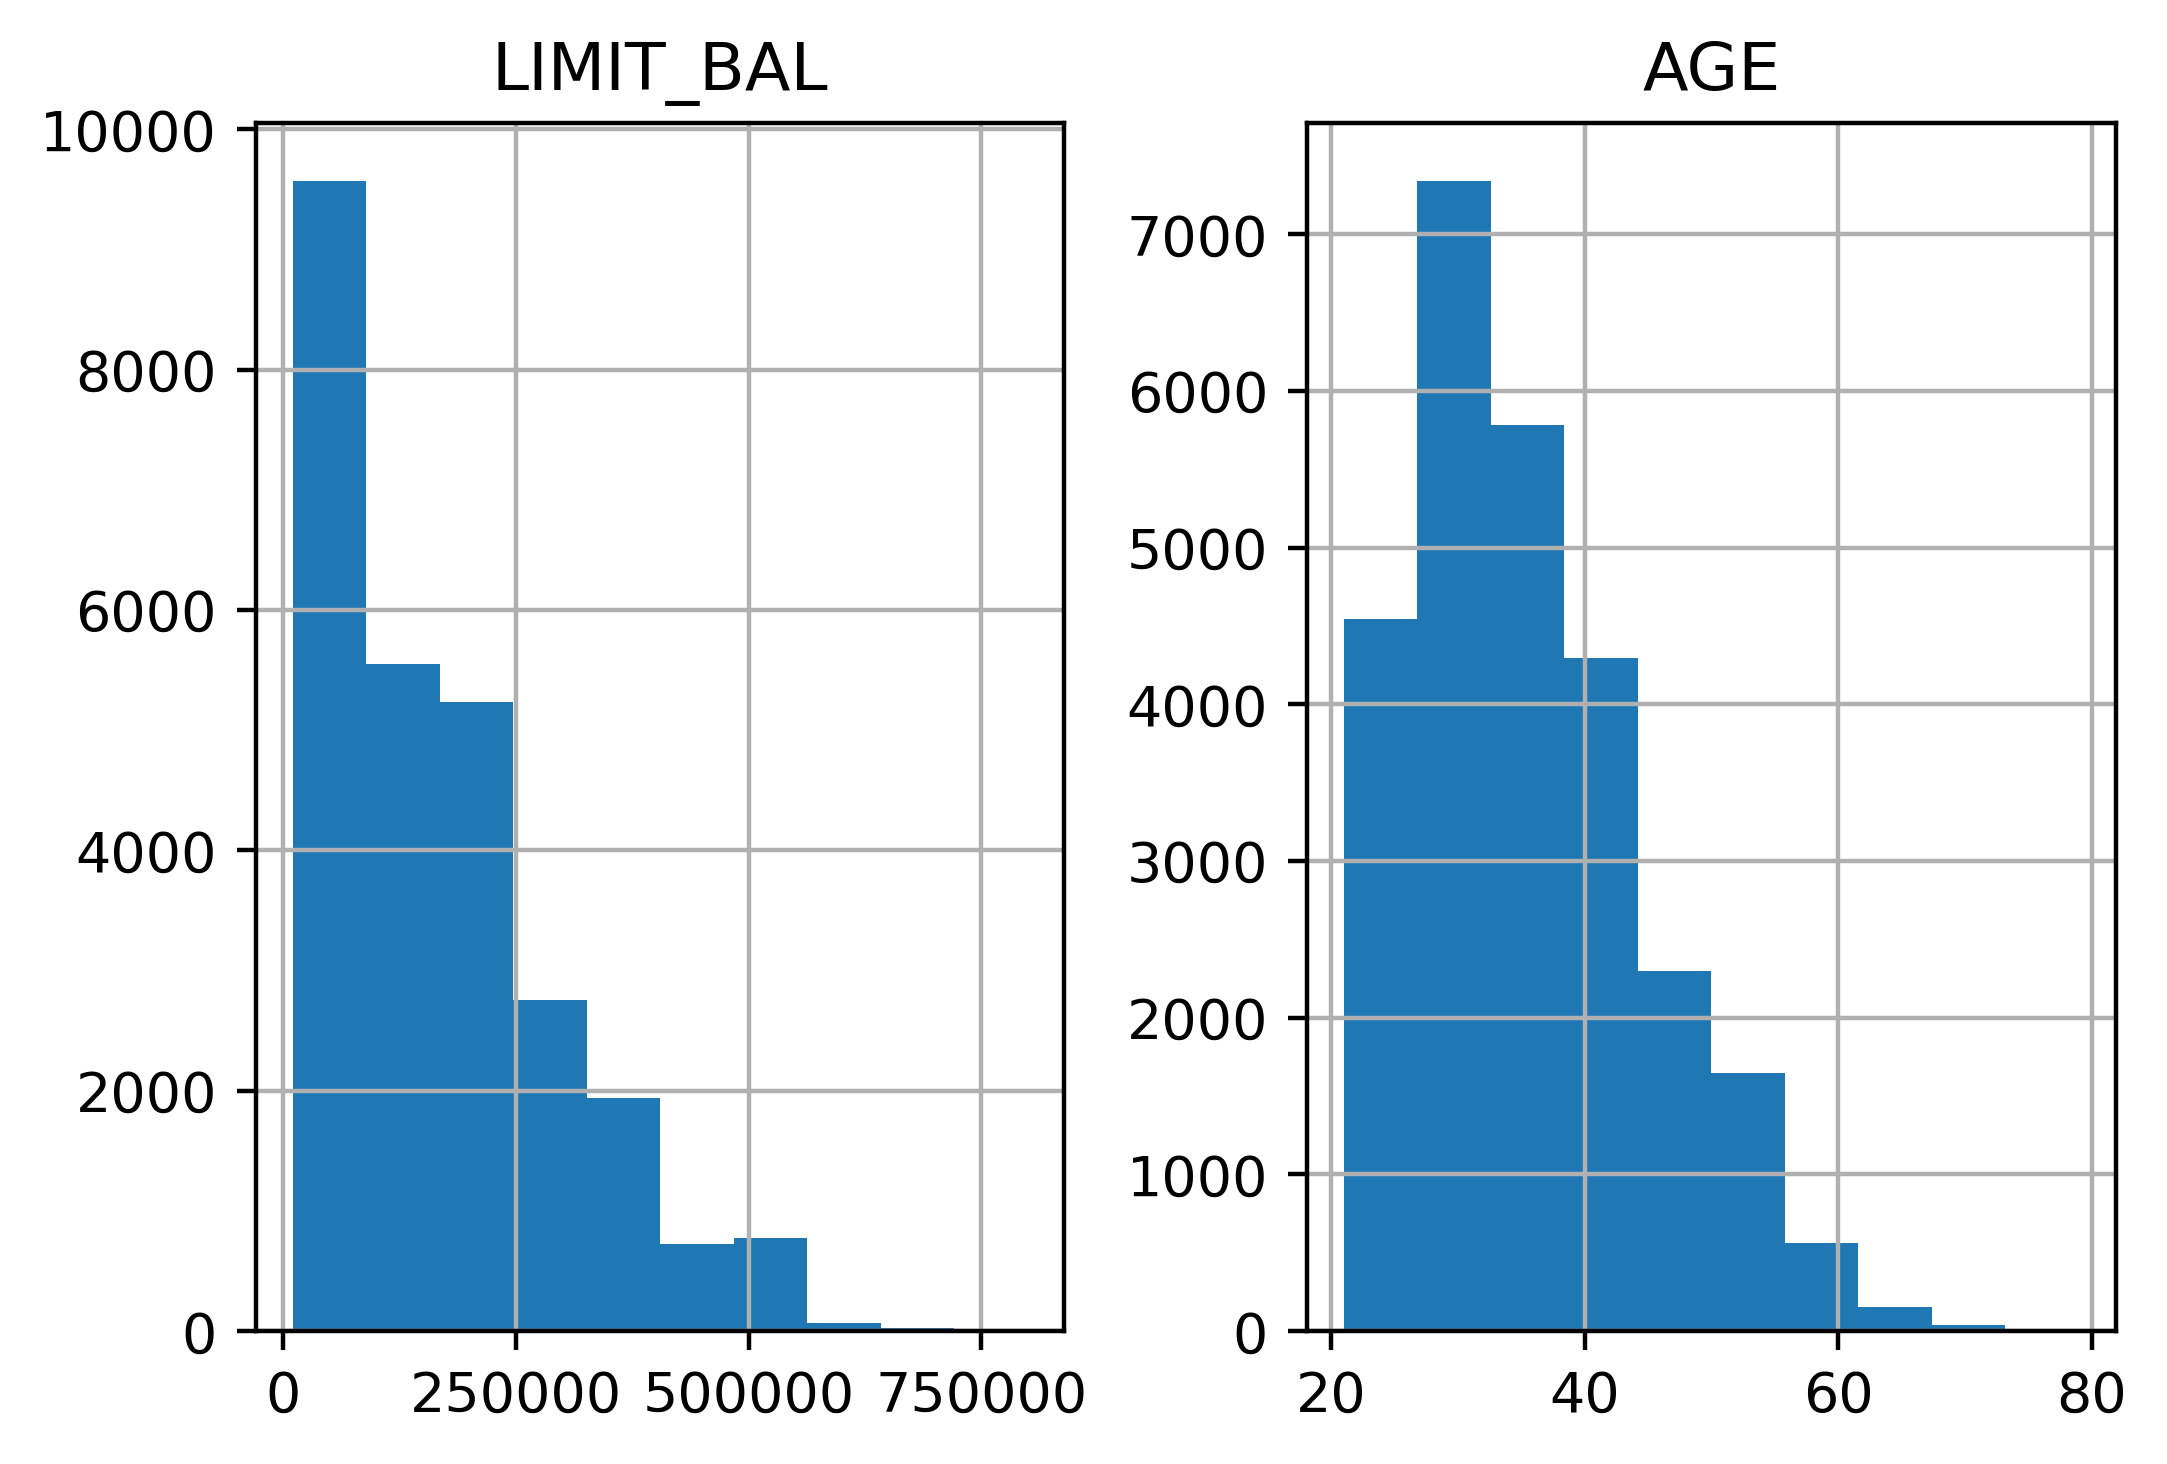

In [62]:
df_clean_2[['LIMIT_BAL','AGE']].hist()

In [64]:
df_clean_2[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [65]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [67]:
df_clean_2['EDUCATION'].replace(to_replace = [0, 5, 6], value = 4, inplace = True)

In [69]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [70]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [71]:
df_clean_2['MARRIAGE'].replace(to_replace = 0, value = 3, inplace = True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

# Deep Dive - Categorical Variables

Text(0.5, 0, 'Education Level : Ordinal Encoding')

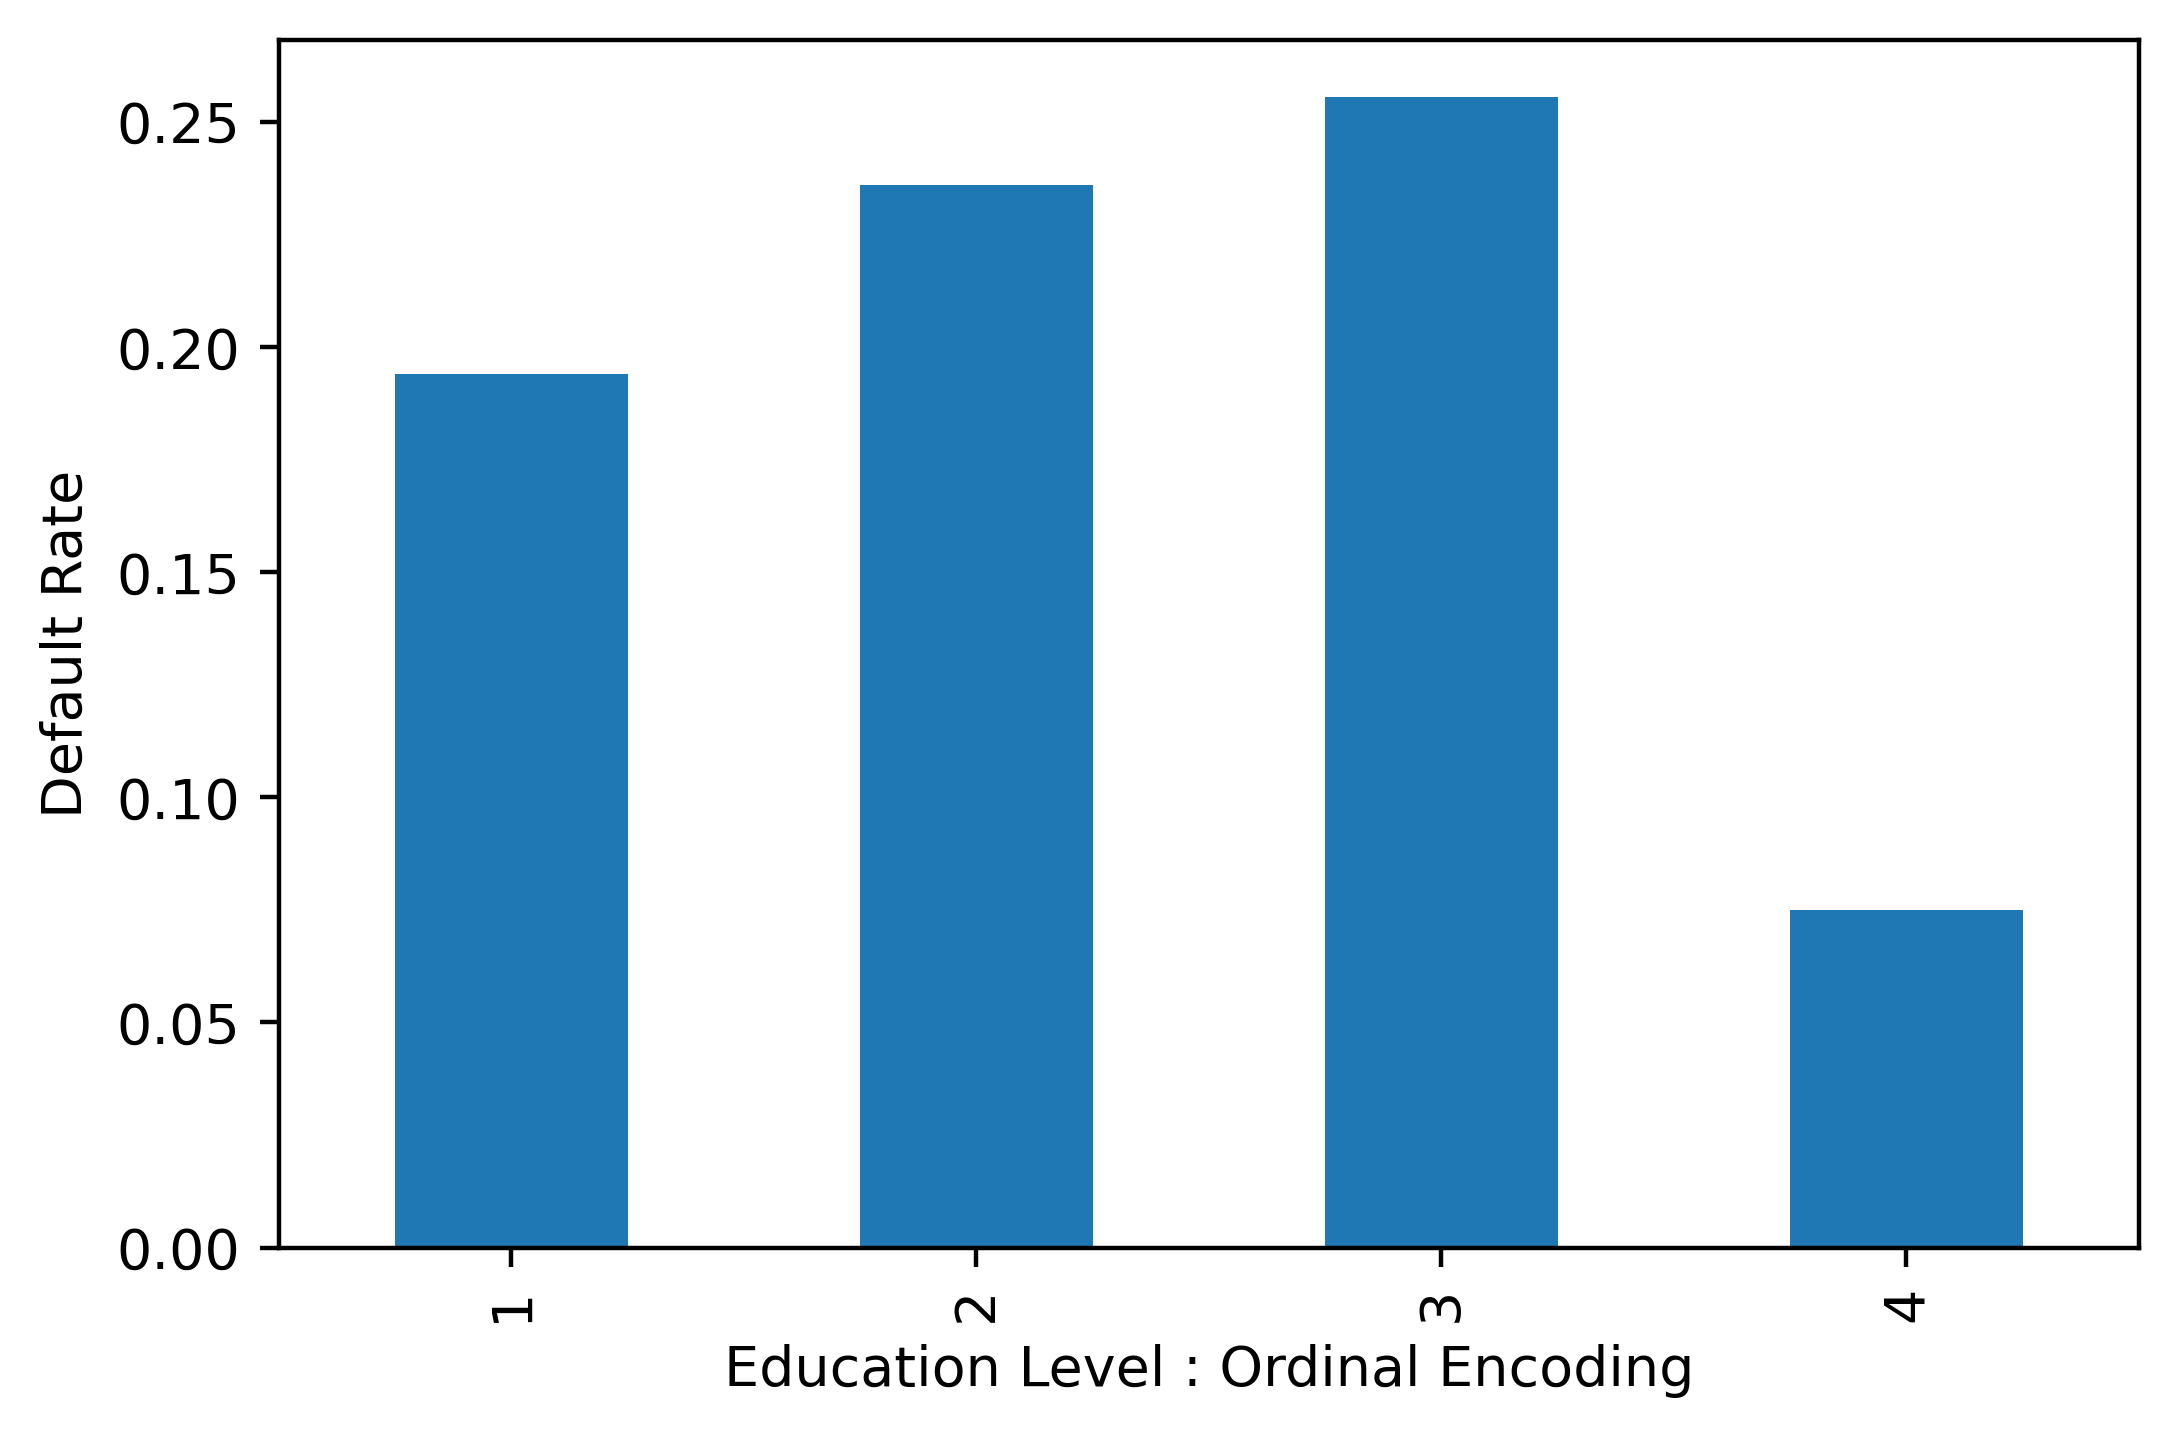

In [86]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend = False)

plt.ylabel('Default Rate')
plt.xlabel('Education Level : Ordinal Encoding')

In [85]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

# Implementing One-hot coding for a Categorical Variable

1. Create a new Column to hold the original string encoding
2. Create a mapping for the levels
    - This is done by creating a dictionary
3. Set the newly created column to the old encoding based on this mapping
4. Use get_dummies from pandas to OHE the variables in a new data frame
5. Concatenate this new data frame with the cleaned data
6. Finally write out the newly created Data frame

In [87]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [89]:
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [90]:
cat_mapping = {
    1 : "graduate school",
    2 : "university",
    3 : "high school",
    4 : "others"
}

In [94]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [96]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [97]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis = 1)
df_with_ohe[['EDUCATION_CAT','graduate school','high school','others','university']].head(10)

,EDUCATION_CAT,graduate school,high school,others,university
0,university,0,0,0,1
1,university,0,0,0,1
2,university,0,0,0,1
3,university,0,0,0,1
4,university,0,0,0,1
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,0,1
8,high school,0,1,0,0
9,high school,0,1,0,0


In [98]:
df_with_ohe.to_csv('/Users/niallsheppard/Python Exercises/Data Exploration and Cleaning/Chapter_1_cleaned_data.csv', index = False)